In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = 'predictive_maintenance.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

# Define feature columns and target variable
features = data.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type'])
target = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression Precision:", precision_log_reg)
print("Logistic Regression Recall:", recall_log_reg)
print("Logistic Regression F1-score:", f1_log_reg)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.973
Logistic Regression Precision: 0.9669301265822785
Logistic Regression Recall: 0.973
Logistic Regression F1-score: 0.9674730068567219
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



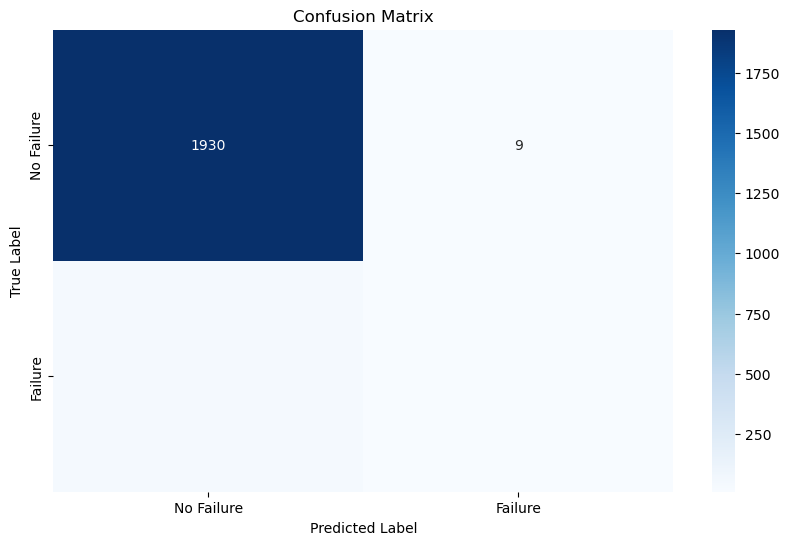

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


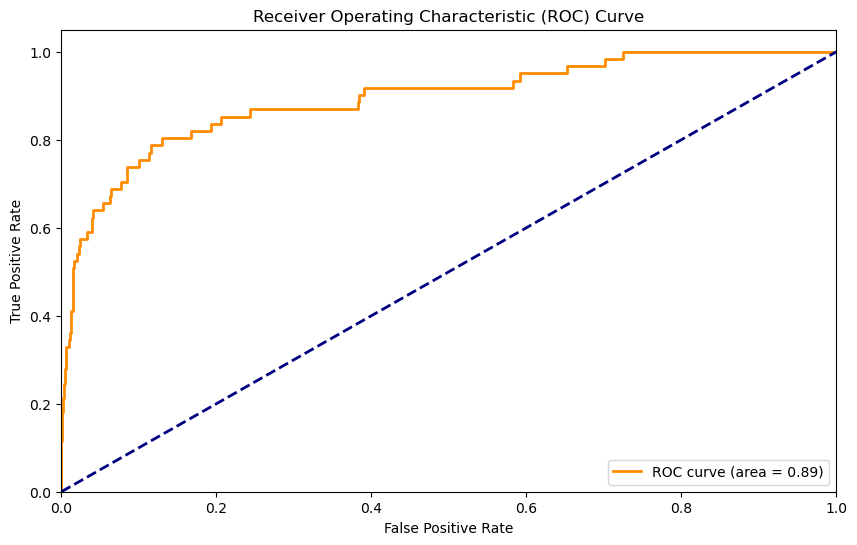

In [4]:
# ROC Curve
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("k-NN Accuracy:", accuracy_knn)
print("k-NN Precision:", precision_knn)
print("k-NN Recall:", recall_knn)
print("k-NN F1-score:", f1_knn)
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.979
k-NN Precision: 0.976808901653808
k-NN Recall: 0.979
k-NN F1-score: 0.9750344394868936
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.85      0.38      0.52        61

    accuracy                           0.98      2000
   macro avg       0.92      0.69      0.76      2000
weighted avg       0.98      0.98      0.98      2000



k-NN Accuracy: 0.979
k-NN Precision: 0.976808901653808
k-NN Recall: 0.979
k-NN F1-score: 0.9750344394868936
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.85      0.38      0.52        61

    accuracy                           0.98      2000
   macro avg       0.92      0.69      0.76      2000
weighted avg       0.98      0.98      0.98      2000



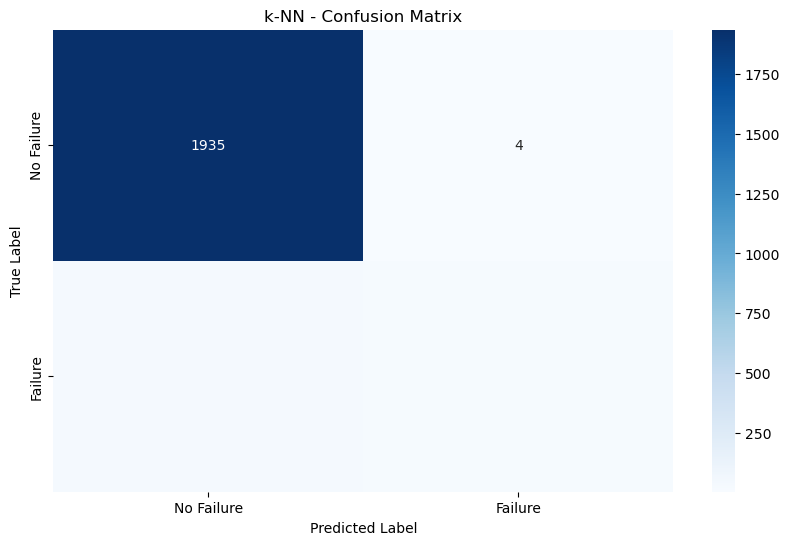

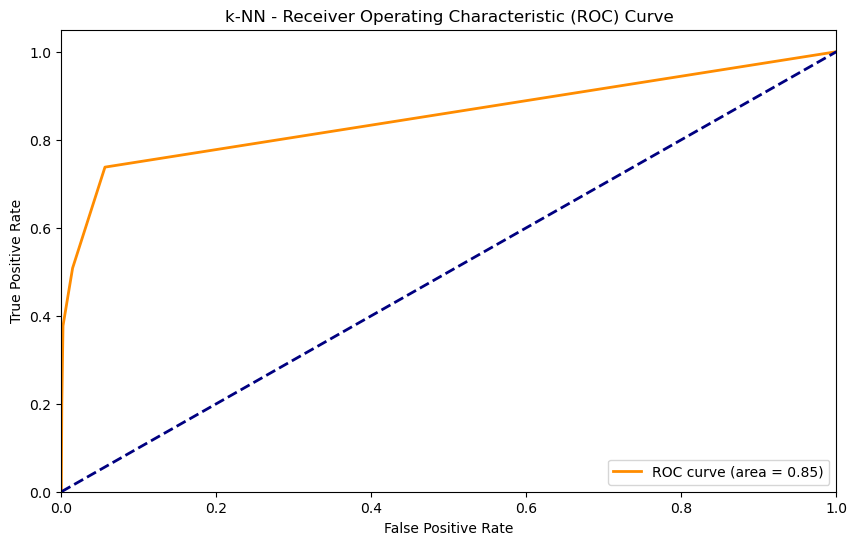

In [5]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("k-NN Accuracy:", accuracy_knn)
print("k-NN Precision:", precision_knn)
print("k-NN Recall:", recall_knn)
print("k-NN F1-score:", f1_knn)
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('k-NN - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine with probability estimates
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)
recall_rf = recall_score(y_test, y_pred_svm, average='weighted')
f1_rf = f1_score(y_test, y_pred_svm, average='weighted')
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for SVM
y_pred_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'X_train_scaled' is not defined

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Accuracy: 0.9785
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.64      0.69      0.66        61

    accuracy                           0.98      2000
   macro avg       0.81      0.84      0.83      2000
weighted avg       0.98      0.98      0.98      2000



Random Forest Accuracy: 0.984
Random Forest Precision: 0.982649855616689
Random Forest Recall: 0.984
Random Forest F1-score: 0.9826523456010109
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



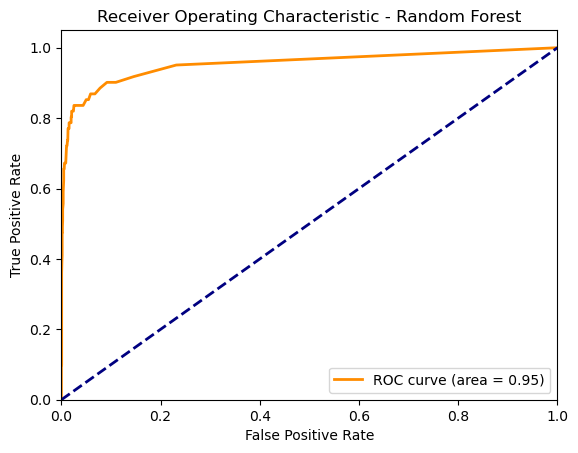

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
# ROC Curve for Random Forest
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [11]:
# This is a simplified representation for illustration.
# Actual implementation may require libraries such as River or scikit-multiflow.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Simulated data stream in batches
data_stream = [(X_batch, y_batch) for X_batch, y_batch in zip(np.array_split(X_train_scaled, 10), np.array_split(y_train, 10))]

# Initialize the Random Forest model
rf_online = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with each batch
for X_batch, y_batch in data_stream:
    rf_online.fit(X_batch, y_batch)
    y_pred_batch = rf_online.predict(X_batch)
    accuracy_batch = accuracy_score(y_batch, y_pred_batch)
    print("Batch Accuracy:", accuracy_batch)




C:\Users\ADMIN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0
Batch Accuracy: 1.0


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Artificial Neural Network
ann = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy_ann = ann.evaluate(X_test_scaled, y_test)
print("ANN Accuracy:", accuracy_ann)

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5787 - loss: 0.6933 - val_accuracy: 0.9588 - val_loss: 0.2828
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9691 - loss: 0.2267 - val_accuracy: 0.9588 - val_loss: 0.1734
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.1487 - val_accuracy: 0.9588 - val_loss: 0.1513
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9699 - loss: 0.1287 - val_accuracy: 0.9588 - val_loss: 0.1390
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9690 - loss: 0.1207 - val_accuracy: 0.9600 - val_loss: 0.1284
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9694 - loss: 0.1102 - val_accuracy: 0.9600 - val_loss: 0.1213
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9666 - loss: 0.1165 - val_accuracy: 0.9625 - val_loss: 0.1154
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9703 - loss: 0.0974 - val_accuracy: 0.